In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Load data

In [76]:
df = pd.read_csv("trainingSetDataItems_input_es.csv", ",", decimal='.')
# bring rv to the end
col = df.pop('rv')
df.insert(loc= 66 , column= 'rv', value= col)
df.fillna(0)
df = df[["kw",'class',"month_into_model_year","msrp_options","years_into_facelift","act_age_in_years","act_contract_duration_in_month", "act_mileage", "mb_resale_volume", "msrp_full", "years_into_lifecycle", "d_amg", "d_diesel", "d_suv_coupe", "d_amg_entry" ,"rv"]]
df_src_inspect = df.groupby(['class'])['class'].count()

df = pd.read_csv("trainingSetDataItems_input_be.csv", ",", decimal='.')
# bring rv to the end
col = df.pop('rv')
df.insert(loc= 66 , column= 'rv', value= col)
df.fillna(0)
df = df[["kw",'class',"month_into_model_year","msrp_options","years_into_facelift","act_age_in_years","act_contract_duration_in_month", "act_mileage", "mb_resale_volume", "msrp_full", "years_into_lifecycle", "d_amg", "d_diesel", "d_suv_coupe", "d_amg_entry" ,"rv"]]
df_tar_inspect = df.groupby(['class'])['class'].count()

In [77]:
print(df_src_inspect)
print(df_tar_inspect)

class
A         21273
AMG GT       22
B         11845
C          9809
CLA        2542
CLS          97
E          2288
EQA          12
EQB           7
EQC          28
G            23
GLA        4451
GLB         201
GLC        1143
GLE         766
GLS          55
S           440
SL            6
SLC         166
SMART      9797
Name: class, dtype: int64
class
A         5008
AMG GT      33
B         3037
C         8142
CLA       3162
CLS        118
E         4188
EQA          4
EQC         76
G           19
GLA        791
GLB         20
GLC       2101
GLE        351
GLS         33
S          201
SL          22
SLC         40
SMART     1728
Name: class, dtype: int64


In [78]:
df = pd.read_csv("trainingSetDataItems_input_es.csv", ",", decimal='.')
# bring rv to the end
col = df.pop('rv')
df.insert(loc= 66 , column= 'rv', value= col)
df = df.fillna(0)
df = df.loc[df['class'] == "A"]
df = df[["kw","month_into_model_year","msrp_options","years_into_facelift","act_age_in_years","act_contract_duration_in_month", "act_mileage", "mb_resale_volume", "msrp_full", "years_into_lifecycle", "d_amg", "d_diesel", "d_suv_coupe", "d_amg_entry" ,"rv"]]

# Source Domain
df_src = df

In [79]:
df = pd.read_csv("trainingSetDataItems_input_be.csv", ",", decimal='.')
# bring rv to the end
col = df.pop('rv')
df.insert(loc= 66 , column= 'rv', value= col)
df = df.fillna(0)
df = df.loc[df['class'] == "A"]
df = df[["kw","month_into_model_year","msrp_options","years_into_facelift","act_age_in_years","act_contract_duration_in_month", "act_mileage", "mb_resale_volume", "msrp_full", "years_into_lifecycle", "d_amg", "d_diesel", "d_suv_coupe", "d_amg_entry" ,"rv"]]

df_tar = df

In [80]:
print(df_src.shape)
print(df_tar.shape)

(21273, 15)
(5008, 15)


In [81]:
# source
Xs = df_src.iloc[:,:-1]
Ys = df_src.iloc[:,-1]

# target_train
Xt = df_tar.iloc[:,:-1]
Yt = df_tar.iloc[:,-1]

In [83]:
print(len(df_src),len(df_tar),len(Xs),len(Ys),len(Xt),len(Yt))

21273 5008 21273 21273 5008 5008


## Metrics

In [84]:
# kann eine Metrik verwendet werden um die Gleichheit der Regressions DF abzubinden ?

from tllib.ranking import negative_conditional_entropy as nce
from tllib.ranking import log_expected_empirical_prediction as leep

from sklearn.metrics.pairwise import paired_cosine_distances
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import haversine_distances
from sklearn.metrics.pairwise import manhattan_distances
from sklearn.metrics.pairwise import paired_cosine_distances
from scipy.stats import wasserstein_distance
from scipy.stats import ks_2samp
from scipy.spatial import distance
from scipy.stats import entropy
from scipy.special import kl_div

from sklearn.metrics import mean_absolute_percentage_error


save_values = []

#Kullback-Leibler Divergenz
kld = 1#kl_div(df_src, df_tar)
save_values.append(kld)
    
# Cosine Distances
cd = 1#paired_cosine_distances(df_src,df_tar).mean()
save_values.append(cd)


# Wasserstein Distance
was = wasserstein_distance(Ys,Yt)
save_values.append(was)


# Ad-Distance
ad = ks_2samp(Ys,Yt)[0]
save_values.append(ad)

# Jensen Shannon
js = 1#distance.jensenshannon(df_src,df_tar).mean()
save_values.append(js)

# Correlation
cor = df_tar.corrwith(Ys).mean()*16
save_values.append(cor)

'''# MMD
mmd = mmd_linear(df_2["x"],df_2["y"],df_combined["x"],df_combined["y"])/30
save_values.append(mmd)'''

'# MMD\nmmd = mmd_linear(df_2["x"],df_2["y"],df_combined["x"],df_combined["y"])/30\nsave_values.append(mmd)'

In [85]:
save_values

[1, 1, 4110.083780907911, 0.4698598258393208, 1, nan]

## Models

In [93]:
from TL_Regression_Methods.BDA import BDA

bda = BDA(kernel_type='primal', dim=30, lamb=1, mu=0.5, mode='BDA', gamma=1, estimate_mu=False)
mse_bda, y_pre_bda, list_acc = bda.fit_predict(Xs, Ys, Xt, Yt)
print(f'The MSE of BDA is: {mse_bda:.4f}')

plt.plot(Yt.reset_index(drop=True))
plt.plot(y_pre_bda)
plt.xlim(0, 200)
plt.title('BDA with MSE: '+ str(mse_bda))
plt.xlabel('Sampels')
plt.ylabel('Strength')
plt.show()

# ISt so implementiert das es so viele Durchläufe gibt wie Klassen 

MemoryError: Unable to allocate 5.15 GiB for an array with shape (26281, 26281) and data type float64

In [94]:
from TL_Regression_Methods.JDA import JDA

jda = JDA(kernel_type='primal', dim=30, lamb=1, gamma=1)
mse_jda, y_pre_jda, list_acc = jda.fit_predict(Xs, Ys, Xt, Yt)
print(f'The accuracy of JDA is: {mse_jda:.4f}')

plt.plot(Yt.reset_index(drop=True))
plt.plot(y_pre_jda)
plt.xlim(0, 200)
plt.title('JDA with MSE: '+ str(mse_jda))
plt.xlabel('Sampels')
plt.ylabel('Strength')
plt.show()

MemoryError: Unable to allocate 5.15 GiB for an array with shape (26281, 26281) and data type float64

The MSE of Coral is: 132067373.2212


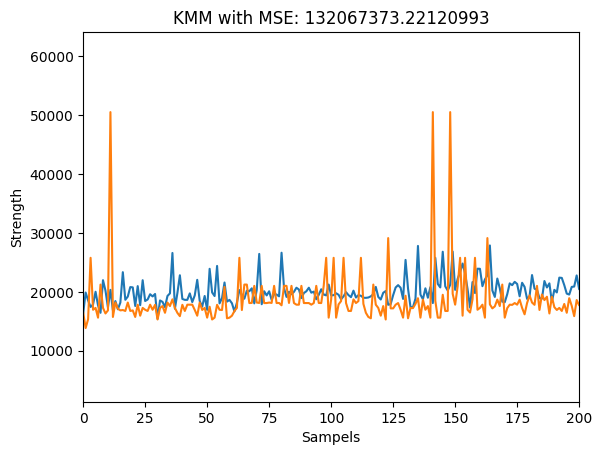

In [88]:
from TL_Regression_Methods.CORAL import CORAL

coral = CORAL()
k = 1
mse_coral, y_pre_coral = coral.fit_predict(Xs, Ys, Xt, Yt, k)
print(f'The MSE of Coral is: {mse_coral:.4f}')

plt.plot(Yt.reset_index(drop=True))
plt.plot(y_pre_coral)
plt.xlim(0, 200)
plt.title('KMM with MSE: '+ str(mse_coral))
plt.xlabel('Sampels')
plt.ylabel('Strength')
plt.show()

MSE using KMM: 16734051.76


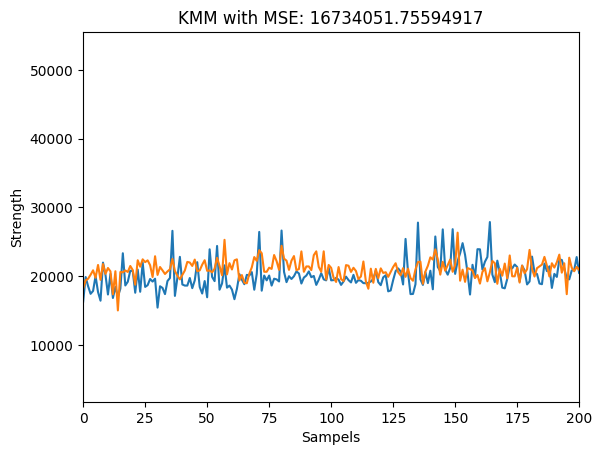

In [89]:
from TL_Regression_Methods.KMM import KMM
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

model = KNeighborsRegressor(n_neighbors=7)
model.fit(Xs, Ys)
y_pre_kmm = model.predict(Xt)
mse_kmm = mean_squared_error(Yt, y_pre_kmm)
print(f'MSE using KMM: {mse_kmm:.2f}')

plt.plot(Yt.reset_index(drop=True))
plt.plot(y_pre_kmm)
plt.xlim(0, 200)
plt.title('KMM with MSE: '+ str(mse_kmm))
plt.xlabel('Sampels')
plt.ylabel('Strength')
plt.show()

21273 4908 100
At step: 8
Binary search's goal not meeted! Value is set to be the available best!
Try reducing the search interval. Current stp interval: 1e-30
At step: 9
Binary search's goal not meeted! Value is set to be the available best!
Try reducing the search interval. Current stp interval: 1e-30


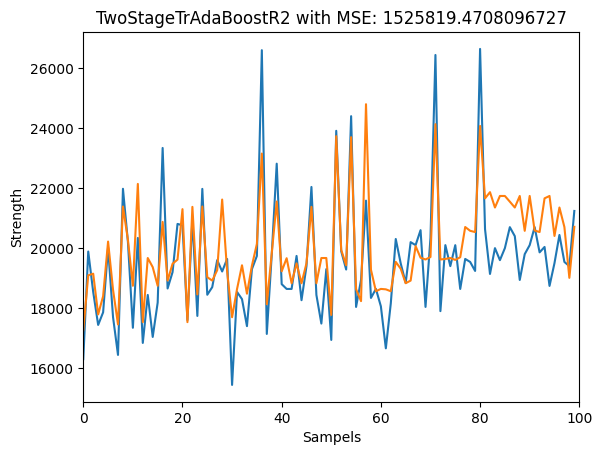

In [90]:
from TL_Regression_Methods.TwoStageTrAdaBoostR2 import TwoStageTrAdaBoostR2
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error

# Train Test Split
df_train = df_tar[100:]
df_test = df_tar[:100]

# source
n_source1 = len(df_src)
x_source1 = df_src.iloc[:,:-1]
y_source1 = df_src.iloc[:,-1]

# target_train
n_target_train = len(df_train)
x_target_train = df_train.iloc[:,:-1]
y_target_train = df_train.iloc[:,-1]

# target_test
n_target_test = len(df_test)
x_target_test = df_test.iloc[:,:-1]
y_target_test = df_test.iloc[:,-1]

print(len(df_src),len(df_train),len(df_test))

# 4. transfer learning regressiong for the target_train data
# 4.1 data combination and initial setting specification
X = np.concatenate((x_source1, x_target_train))
y = np.concatenate((y_source1, y_target_train))
sample_size = [n_source1, n_target_train]

n_estimators = 80
steps = 10
fold = 5
random_state = np.random.RandomState(1)

regr_1 = TwoStageTrAdaBoostR2(DecisionTreeRegressor(max_depth=8),
                      n_estimators = n_estimators, sample_size = sample_size, 
                      steps = steps, fold = fold, 
                      random_state = random_state)
regr_1.fit(X, y)
y_pre_twostageboost = regr_1.predict(x_target_test)
mse_twostageboost = mean_squared_error(y_target_test, y_pre_twostageboost) 

plt.plot(y_target_test.reset_index(drop=True))
plt.plot(y_pre_twostageboost)
plt.xlim(0, 100)
plt.title('TwoStageTrAdaBoostR2 with MSE: '+ str(mse_twostageboost))
plt.xlabel('Sampels')
plt.ylabel('Strength')
plt.show()

In [51]:
#from TL_Regression_Methods.KMM import KMM
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

#BDA
bda = BDA(kernel_type='primal', dim=30, lamb=1, mu=0.5, mode='BDA', gamma=1, estimate_mu=False)
mse_bda, y_pre_bda, list_acc = bda.fit_predict(Xs, Ys, Xt, Yt)

#JDA
jda = JDA(kernel_type='primal', dim=30, lamb=1, gamma=1)
mse_jda, y_pre_jda, list_acc = jda.fit_predict(Xs, Ys, Xt, Yt)

#Coral
coral = CORAL()
k = 1
mse_coral, y_pre_coral = coral.fit_predict(Xs, Ys, Xt, Yt, k)

#KMM
model = KNeighborsRegressor(n_neighbors=7)
model.fit(Xs, Ys)
y_pre_kmm = model.predict(Xt)
mse_kmm = sklearn.metrics.mean_squared_error(Yt, ypre_kmm)

ValueError: array must not contain infs or NaNs

## Baseline

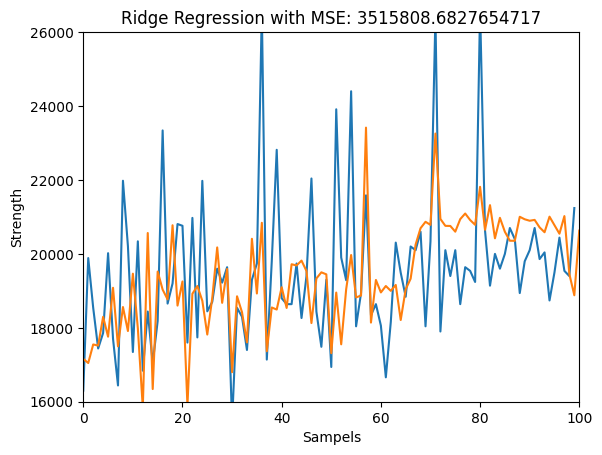

In [100]:
import sklearn
from sklearn.linear_model import Ridge

clf = Ridge(alpha=1.0)
clf.fit(Xt, Yt)
y_pre_ridge = clf.predict(Xt)
mse_ridge = sklearn.metrics.mean_squared_error(Yt, y_pre_ridge)

plt.plot(y_target_test.reset_index(drop=True))
plt.plot(y_pre_ridge)
plt.xlim(0, 100)
plt.ylim(16000, 26000)
plt.title('Ridge Regression with MSE: '+ str(mse_ridge))
plt.xlabel('Sampels')
plt.ylabel('Strength')
plt.show()

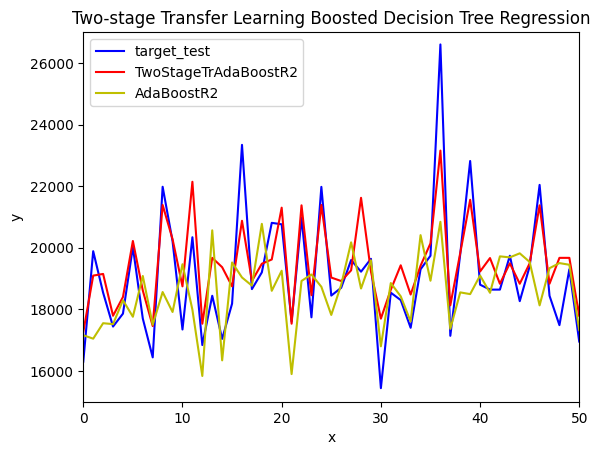

In [105]:
# 4.4 Plot the results
plt.figure()
#plt.plot(y_target_train.reset_index()["9,00"], c="k", label="target_train")
plt.plot( y_target_test.reset_index(drop=True), c="b", label="target_test")
plt.plot( y_pre_twostageboost, c="r", label="TwoStageTrAdaBoostR2")
plt.plot(y_pre_ridge, c="y", label="AdaBoostR2")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim(0, 50)
plt.ylim(15000, 27000)
plt.title("Two-stage Transfer Learning Boosted Decision Tree Regression")
plt.legend()
plt.show()

## Results

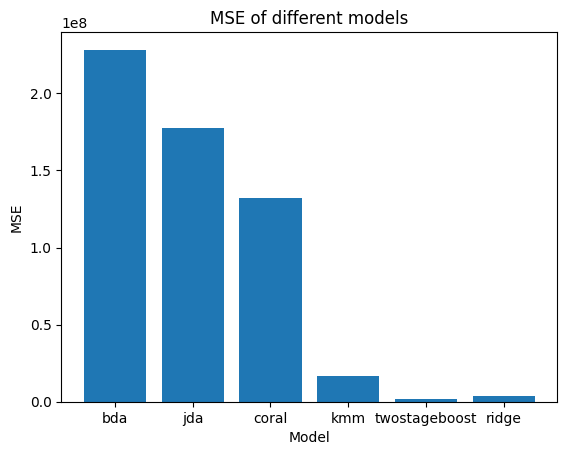

In [92]:
import sys
modname = globals()['__name__']
modobj  = sys.modules[modname]

models = ['bda', 'jda', 'coral', 'kmm','twostageboost', 'ridge']
mse = []
for i in metrics:
    mse.append(getattr(modobj, "mse_"+ str(i)))

zipped = list(zip(models, mse))

df = pd.DataFrame(zipped, columns=['models', 'mse'])

plt.bar(df['models'], df['mse'])
plt.title('MSE of different models')
plt.xlabel('Model')
plt.ylabel('MSE')
plt.show()

In [75]:
df

,models,mse
0,bda,2.283358e+08
1,jda,1.774077e+08
2,coral,1.810783e+08
3,kmm,1.465369e+08
4,twostageboost,7.537559e+07
5,ridge,4.086945e+07


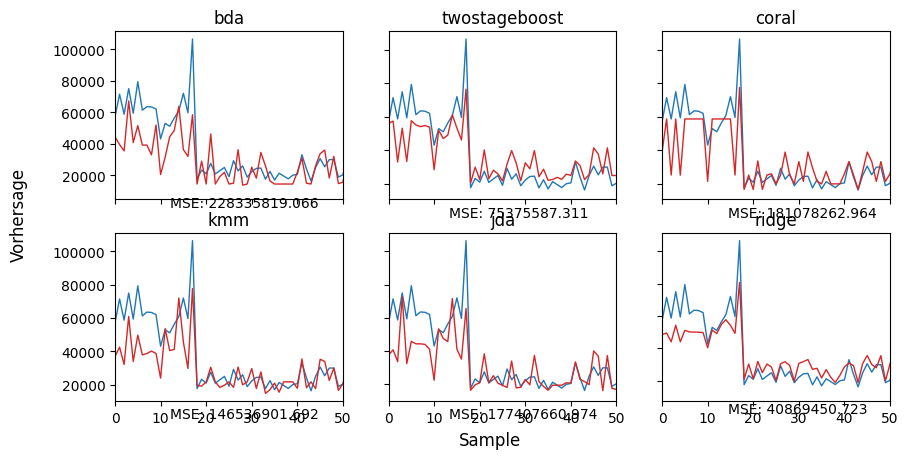

In [65]:
import sys
modname = globals()['__name__']
modobj  = sys.modules[modname]

metrics= ['bda', 'jda', 'coral', 'kmm','twostageboost', 'ridge']
colours= ['#1f77b4', '#2ca02c', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf','#1f77b4']
hor= [0,1,2,0,1,2]
ver= [0,1,0,1,0,1]

fig, axs = plt.subplots(2, 3)

c = 0
for i in metrics:
    axs[ver[c], hor[c]].plot(Yt.reset_index(drop=True), c='#1f77b4', label=i, linewidth=1)
    axs[ver[c], hor[c]].plot(getattr(modobj, "y_pre_"+ str(i)), c='#d62728', label=i, linewidth=1)
    axs[ver[c], hor[c]].set_title(i)
    axs[ver[c], hor[c]].set_xlim([0, 50])
    axs[ver[c], hor[c]].text(hor[c]*1.2+12, ver[c]*-1.2+2.15, 'MSE: '+ str(round(getattr(modobj, "mse_"+ str(i)),3)) )
    c+=1

fig.supxlabel('Sample')
fig.supylabel('Vorhersage')
fig.set_figwidth(10) 

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()